In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df=pd.read_csv("./jamb_exam_results.csv")

In [4]:
df.head()

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


In [5]:
df.isna().sum()

JAMB_Score                        0
Study_Hours_Per_Week              0
Attendance_Rate                   0
Teacher_Quality                   0
Distance_To_School                0
School_Type                       0
School_Location                   0
Extra_Tutorials                   0
Access_To_Learning_Materials      0
Parent_Involvement                0
IT_Knowledge                      0
Student_ID                        0
Age                               0
Gender                            0
Socioeconomic_Status              0
Parent_Education_Level          891
Assignments_Completed             0
dtype: int64

In [6]:
df.shape

(5000, 17)

In [7]:
df['Parent_Education_Level'].nunique()

3

In [8]:
df=df.dropna()

In [9]:
df.describe()

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,Student_ID,Age,Assignments_Completed
count,4109.000000,4109.000000,4109.000000,4109.000000,4109.000000,4109.000000,4109.000000,4109.000000
mean,176.569482,19.689462,84.413483,2.536140,9.947384,2505.030908,18.438063,1.818447
std,48.456360,9.607737,9.464875,0.983541,4.851763,1448.058722,2.297361,0.993229
min,100.000000,0.000000,50.000000,1.000000,0.000000,1.000000,15.000000,1.000000
25%,137.000000,13.000000,78.000000,2.000000,6.600000,1236.000000,16.000000,1.000000
50%,173.000000,20.000000,85.000000,2.000000,9.900000,2509.000000,18.000000,2.000000
75%,213.000000,26.000000,91.000000,3.000000,13.400000,3763.000000,20.000000,2.000000
max,367.000000,40.000000,100.000000,5.000000,20.000000,4999.000000,22.000000,5.000000


In [10]:
encode_categorical_variable=['School_Type','School_Location', 'Extra_Tutorials', 'Access_To_Learning_Materials','Parent_Involvement','IT_Knowledge','Gender', 'Socioeconomic_Status','Parent_Education_Level']
numeric_variable=['Study_Hours_Per_Week','Attendance_Rate', 'Distance_To_School','Age']
df['Attendance_Rate']=df['Attendance_Rate']/100.0

In [11]:
#encoding categorical values
from sklearn.preprocessing import OneHotEncoder


encoder=OneHotEncoder(sparse_output=False, drop='first')
encoder_array=encoder.fit_transform(df[encode_categorical_variable]).astype(int)


encoded_df=pd.DataFrame(encoder_array, columns=encoder.get_feature_names_out(encode_categorical_variable), index=df.index)
df=df.drop(encode_categorical_variable, axis=1)
df=pd.concat([df, encoded_df], axis=1)


In [43]:
top_10_unique = df.drop_duplicates(subset=['JAMB_Score']).nlargest(10, 'JAMB_Score')
bottom_10_unique = df.drop_duplicates(subset=['JAMB_Score']).nsmallest(10, 'JAMB_Score')

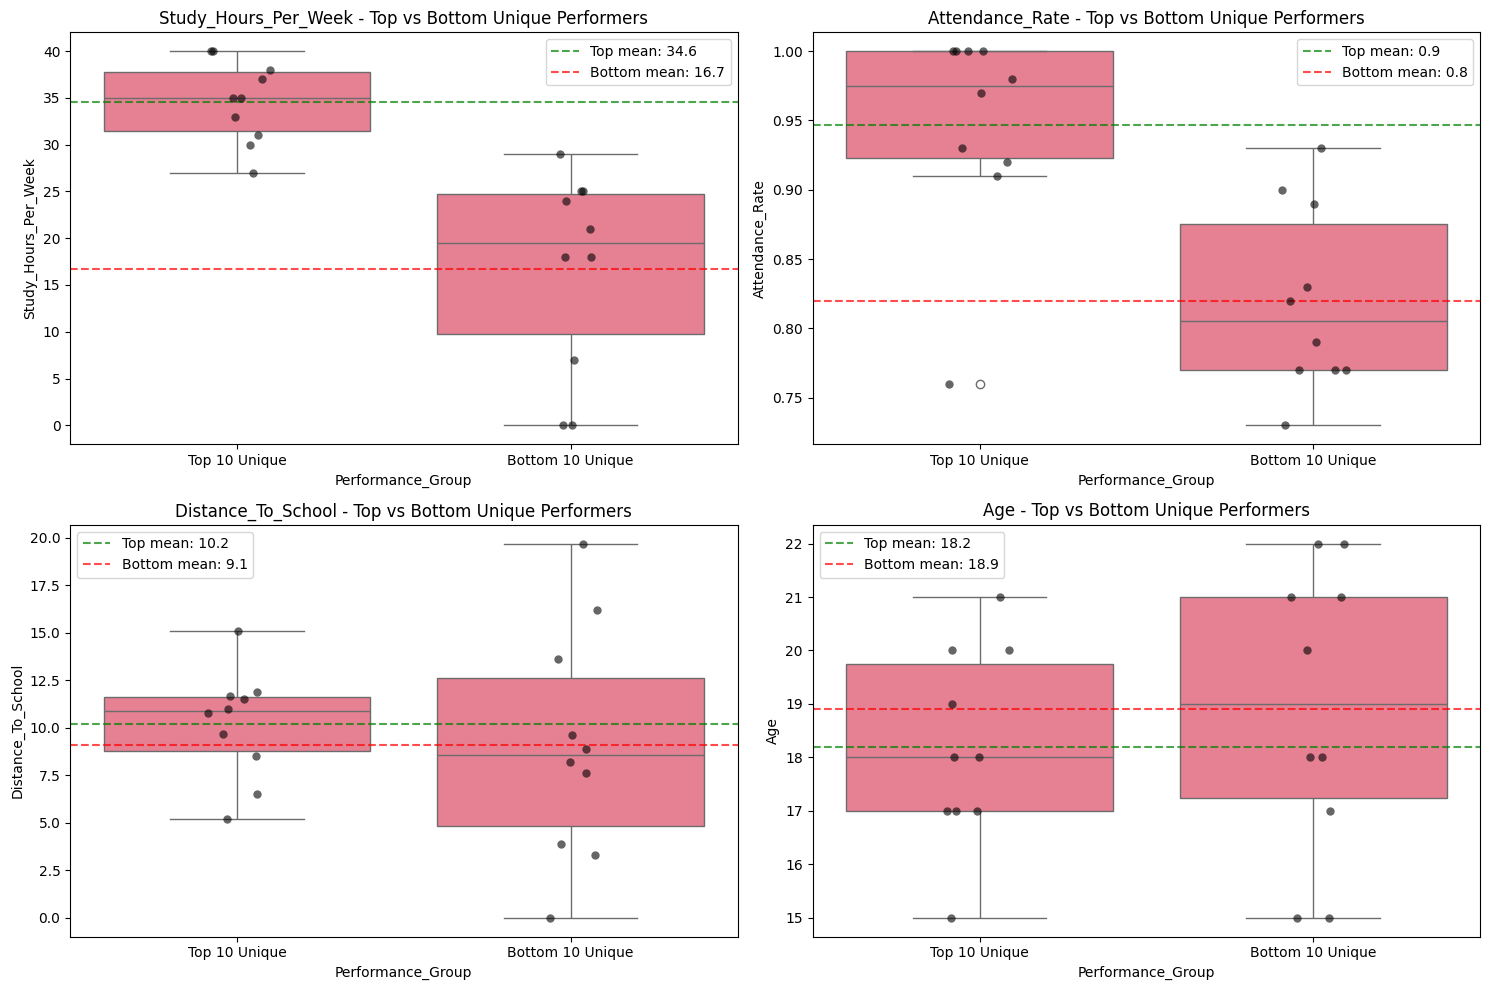

In [46]:
comparison_unique = pd.concat([top_10_unique, bottom_10_unique])
comparison_unique['Performance_Group'] = ['Top 10 Unique'] * len(top_10_unique) + ['Bottom 10 Unique'] * len(bottom_10_unique)


features_to_compare = ['Study_Hours_Per_Week', 'Attendance_Rate', 'Distance_To_School', 'Age']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(features_to_compare):
   
    sns.boxplot(data=comparison_unique, x='Performance_Group', y=feature, ax=axes[i])
    axes[i].set_title(f'{feature} - Top vs Bottom Unique Performers')
    axes[i].set_xlabel('')
    
   
    sns.stripplot(data=comparison_unique, x='Performance_Group', y=feature, 
                  ax=axes[i], color='black', alpha=0.6, size=6, jitter=True)
    
    
    top_mean = top_10_unique[feature].mean()
    bottom_mean = bottom_10_unique[feature].mean()
    axes[i].axhline(top_mean, color='green', linestyle='--', alpha=0.7, label=f'Top mean: {top_mean:.1f}')
    axes[i].axhline(bottom_mean, color='red', linestyle='--', alpha=0.7, label=f'Bottom mean: {bottom_mean:.1f}')
    axes[i].legend()

plt.tight_layout()
plt.savefig('Top_bottom_10_matrix.png', dpi=300, bbox_inches='tight')

plt.show()

In [12]:
df.head()

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,Student_ID,Age,Assignments_Completed,School_Type_Public,School_Location_Urban,...,Access_To_Learning_Materials_Yes,Parent_Involvement_Low,Parent_Involvement_Medium,IT_Knowledge_Low,IT_Knowledge_Medium,Gender_Male,Socioeconomic_Status_Low,Socioeconomic_Status_Medium,Parent_Education_Level_Secondary,Parent_Education_Level_Tertiary
0,192,22,0.78,4,12.4,1,17,2,1,1,...,1,0,0,0,1,1,1,0,0,1
2,182,29,0.87,2,9.6,3,20,2,1,0,...,1,0,0,0,1,0,0,0,0,1
3,210,29,0.99,2,2.6,4,22,1,1,1,...,1,0,1,0,0,0,0,1,0,1
4,199,12,0.98,3,8.8,5,22,1,1,1,...,1,0,1,0,1,0,0,1,0,1
5,202,25,0.85,2,13.6,6,15,1,1,1,...,0,0,1,1,0,1,1,0,0,1


In [13]:
from scipy import stats


df_zscore=df[numeric_variable].apply(stats.zscore)

df_zscore=df_zscore.add_suffix('_zscore')
df=pd.concat([df, df_zscore], axis=1)

In [14]:
df

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,Student_ID,Age,Assignments_Completed,School_Type_Public,School_Location_Urban,...,IT_Knowledge_Medium,Gender_Male,Socioeconomic_Status_Low,Socioeconomic_Status_Medium,Parent_Education_Level_Secondary,Parent_Education_Level_Tertiary,Study_Hours_Per_Week_zscore,Attendance_Rate_zscore,Distance_To_School_zscore,Age_zscore
0,192,22,0.78,4,12.4,1,17,2,1,1,...,1,1,1,0,0,1,0.240516,-0.677691,0.505572,-0.626039
2,182,29,0.87,2,9.6,3,20,2,1,0,...,1,0,0,0,0,1,0.969185,0.273309,-0.071608,0.679966
3,210,29,0.99,2,2.6,4,22,1,1,1,...,0,0,0,1,0,1,0.969185,1.541309,-1.514558,1.550636
4,199,12,0.98,3,8.8,5,22,1,1,1,...,1,0,0,1,0,1,-0.800438,1.435642,-0.236517,1.550636
5,202,25,0.85,2,13.6,6,15,1,1,1,...,0,1,1,0,0,1,0.552803,0.061975,0.752935,-1.496709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,233,19,0.81,3,7.8,4995,22,1,1,1,...,0,1,0,1,1,0,-0.071770,-0.360691,-0.442653,1.550636
4995,183,20,0.74,2,10.6,4996,16,2,1,1,...,0,1,0,1,0,0,0.032326,-1.100358,0.134528,-1.061374
4996,179,0,0.80,2,20.0,4997,22,1,1,0,...,1,1,1,0,1,0,-2.049583,-0.466358,2.072203,1.550636
4997,261,17,0.89,3,11.3,4998,18,3,1,1,...,0,1,0,1,0,0,-0.279961,0.484642,0.278823,-0.190704


In [15]:
df.columns

Index(['JAMB_Score', 'Study_Hours_Per_Week', 'Attendance_Rate',
       'Teacher_Quality', 'Distance_To_School', 'Student_ID', 'Age',
       'Assignments_Completed', 'School_Type_Public', 'School_Location_Urban',
       'Extra_Tutorials_Yes', 'Access_To_Learning_Materials_Yes',
       'Parent_Involvement_Low', 'Parent_Involvement_Medium',
       'IT_Knowledge_Low', 'IT_Knowledge_Medium', 'Gender_Male',
       'Socioeconomic_Status_Low', 'Socioeconomic_Status_Medium',
       'Parent_Education_Level_Secondary', 'Parent_Education_Level_Tertiary',
       'Study_Hours_Per_Week_zscore', 'Attendance_Rate_zscore',
       'Distance_To_School_zscore', 'Age_zscore'],
      dtype='object')

In [16]:
df1=df[['JAMB_Score','Attendance_Rate','Teacher_Quality','School_Type_Public', 'School_Location_Urban','Extra_Tutorials_Yes','Access_To_Learning_Materials_Yes', 'Parent_Involvement_Low','IT_Knowledge_Low', 'IT_Knowledge_Medium','Socioeconomic_Status_Low', 'Socioeconomic_Status_Medium','Parent_Education_Level_Tertiary','Study_Hours_Per_Week_zscore','Distance_To_School_zscore', 'Age_zscore']]

In [17]:
plt.style.use('default')
sns.set_palette('husl')

features=['JAMB_Score', 'Extra_Tutorials_Yes','Access_To_Learning_Materials_Yes', 'Parent_Education_Level_Tertiary','Study_Hours_Per_Week_zscore','Attendance_Rate','Distance_To_School_zscore', 'Age_zscore', 'School_Type_Public'] 

In [18]:
coree_matrix=df1[features].corr()

In [19]:
jamb_corr=coree_matrix['JAMB_Score'].sort_values(ascending=False)

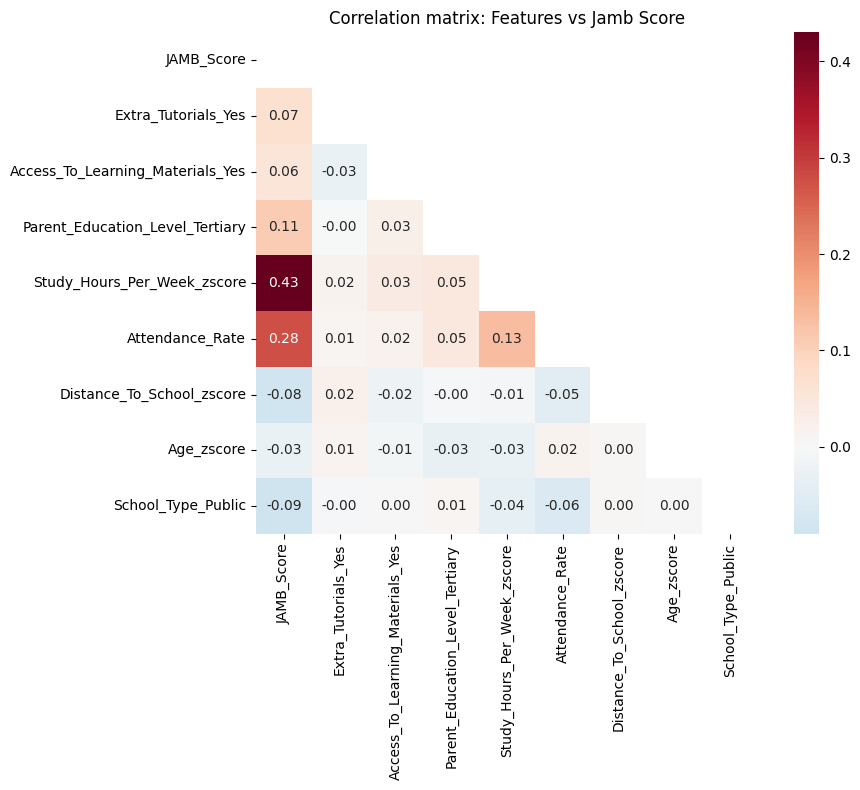

In [20]:
plt.figure(figsize=(10,8))
mask=np.triu(np.ones_like(coree_matrix, dtype=bool))
sns.heatmap(coree_matrix, annot=True, cmap='RdBu_r', center=0, square=True, fmt='.2f', mask=mask)
plt.title('Correlation matrix: Features vs Jamb Score')
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

features_no_jamb_score=['Extra_Tutorials_Yes','Access_To_Learning_Materials_Yes', 'Parent_Education_Level_Tertiary','Study_Hours_Per_Week_zscore','Attendance_Rate','Distance_To_School_zscore', 'Age_zscore', 'School_Type_Public'] 
X = df1[features_no_jamb_score]
y = df['JAMB_Score']

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("Actual Feature Importance from Random Forest:")
print(feature_importance)

Actual Feature Importance from Random Forest:
                            feature  importance
3       Study_Hours_Per_Week_zscore    0.306400
5         Distance_To_School_zscore    0.260281
4                   Attendance_Rate    0.200036
6                        Age_zscore    0.112522
0               Extra_Tutorials_Yes    0.031572
1  Access_To_Learning_Materials_Yes    0.030696
2   Parent_Education_Level_Tertiary    0.030097
7                School_Type_Public    0.028396


In [22]:
potential_features = jamb_corr[abs(jamb_corr) > 0.1].index
potential_features = potential_features.drop('JAMB_Score')  
print("Features with meaningful correlation:", list(potential_features))

Features with meaningful correlation: ['Study_Hours_Per_Week_zscore', 'Attendance_Rate', 'Parent_Education_Level_Tertiary']


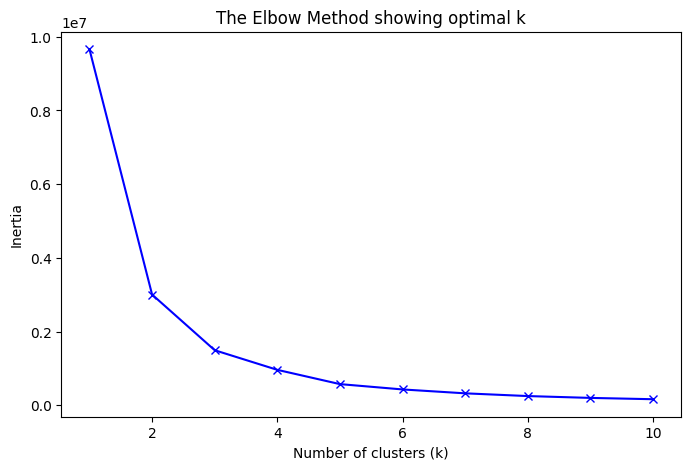

         JAMB_Score  Attendance_Rate  Teacher_Quality  School_Type_Public  \
Cluster                                                                     
0        225.846591         0.869375         2.856061            0.710227   
1        174.836735         0.843279         2.521769            0.752381   
2        124.382545         0.815811         2.217455            0.794182   
3        283.625000         0.909279         3.120192            0.644231   

         School_Location_Urban  Extra_Tutorials_Yes  \
Cluster                                               
0                     0.586174             0.589015   
1                     0.561905             0.528571   
2                     0.565818             0.521455   
3                     0.615385             0.634615   

         Access_To_Learning_Materials_Yes  Parent_Involvement_Low  \
Cluster                                                             
0                                0.699811                0.327652   

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


X_cluster = df1[features]




inertia = []
k_range = range(1, 11) 

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing optimal k')
plt.savefig('Kmeans Elbow method', dpi=300, bbox_inches='tight')

plt.show()

optimal_k = 4

final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = final_kmeans.fit_predict(X_cluster)


df1.loc[:,'Cluster'] = cluster_labels

cluster_profile = df1.groupby('Cluster').mean(numeric_only=True)
print(cluster_profile)

In [ ]:

optimal_k=2
final_kmeans=KMeans(n_clusters=2, random_state=42, n_init=10)
cluster_labels=final_kmeans.fit_predict(X_cluster)
df1.loc[:,'Student_cluster']=cluster_labels

C:\Users\Ramatu\AppData\Local\Temp\ipykernel_18936\2928443315.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[:,'Student_cluster']=cluster_labels


In [25]:
df.loc[:,'Student_cluster']=cluster_labels


In [26]:
cluster_summary = df.groupby('Student_cluster').agg({
    'JAMB_Score': ['mean', 'std', 'count'],
    'Study_Hours_Per_Week': ['mean', 'std'],
    'Attendance_Rate': ['mean', 'std'],
    'Distance_To_School': ['mean', 'std']
}).round(2)

print("=== CLUSTER PROFILES ===")
print(cluster_summary)

=== CLUSTER PROFILES ===
                JAMB_Score              Study_Hours_Per_Week        \
                      mean    std count                 mean   std   
Student_cluster                                                      
0                   140.04  23.40  2253                16.51  8.89   
1                   220.91  30.78  1856                23.55  9.01   

                Attendance_Rate       Distance_To_School        
                           mean   std               mean   std  
Student_cluster                                                 
0                          0.83  0.09              10.23  4.77  
1                          0.87  0.09               9.60  4.93  


In [ ]:
middle_scores = df[
    (df['JAMB_Score'] >= 140) & 
    (df['JAMB_Score'] <= 213)
]

print(f"Students scoring between 140-213: {len(middle_scores)}")
print(f"Total students: {len(df)}")
print(f"Percentage in middle range: {len(middle_scores)/len(df)*100:.1f}%")

middle_by_cluster = middle_scores.groupby('Student_cluster').agg({
    'JAMB_Score': ['count', 'mean'],
    'Study_Hours_Per_Week': 'mean'
}).round(2)

print("\n=== STUDENTS SCORING 140-213 (BY CLUSTER) ===")
print(middle_by_cluster)

Students scoring between 140-213: 2012
Total students: 4109
Percentage in middle range: 49.0%

=== STUDENTS SCORING 140-213 (BY CLUSTER) ===
                JAMB_Score         Study_Hours_Per_Week
                     count    mean                 mean
Student_cluster                                        
0                     1167  159.59                18.05
1                      845  195.22                21.39


In [39]:
cluster_comparison = df.groupby('Student_cluster').agg({
    'JAMB_Score': 'mean',
    'Study_Hours_Per_Week': 'mean',
    'Attendance_Rate': 'mean',
    'Distance_To_School': 'mean',
    'Access_To_Learning_Materials_Yes': 'mean',
    'Extra_Tutorials_Yes': 'mean',
    'Parent_Education_Level_Tertiary': 'mean'
}).round(3)

print("=== FULL CLUSTER COMPARISON")
print(cluster_comparison)

=== FULL CLUSTER COMPARISON
                 JAMB_Score  Study_Hours_Per_Week  Attendance_Rate  \
Student_cluster                                                      
0                   140.043                16.511            0.826   
1                   220.909                23.548            0.866   

                 Distance_To_School  Access_To_Learning_Materials_Yes  \
Student_cluster                                                         
0                            10.231                             0.648   
1                             9.603                             0.695   

                 Extra_Tutorials_Yes  Parent_Education_Level_Tertiary  
Student_cluster                                                        
0                              0.523                            0.258  
1                              0.577                            0.343  


In [29]:
df['JAMB_Score'] = df['JAMB_Score'].astype(int)
df['Study_Hours_Per_Week'] = df['Study_Hours_Per_Week'].astype(int)

In [ ]:
study_hour_range = df[
    (df['Study_Hours_Per_Week'] >= 14) & 
    (df['Study_Hours_Per_Week'] <= 16)
]

if len(study_hour_range) > 0:
    fifteen_hour_analysis = study_hour_range.groupby('Student_cluster').agg({
        'JAMB_Score': 'mean',
        'Attendance_Rate': 'mean',
        'Distance_To_School': 'mean',
        'Study_Hours_Per_Week': 'mean'
    }).round(2).rename(columns={'Student_Cluster': 'Student_Count'})

    fifteen_hour_analysis['JAMB_Score'] = fifteen_hour_analysis['JAMB_Score'].round().astype(int)
    fifteen_hour_analysis['Study_Hours_Per_Week'] = fifteen_hour_analysis['Study_Hours_Per_Week'].round().astype(int)
    
    print("\nSTUDENTS WITH 15 STUDY HOURS (BY CLUSTER) ===")
    print(fifteen_hour_analysis)
else:
    study_hour_range = df[
        (df['Study_Hours_Per_Week'] >= 10) & 
        (df['Study_Hours_Per_Week'] <= 20)
    ]
    print(f"Students with 10-20 study hours by cluster:")
    print(study_hour_range.groupby('Student_Cluster')['JAMB_Score'].mean())


STUDENTS WITH 15 STUDY HOURS (BY CLUSTER) ===
                 JAMB_Score  Attendance_Rate  Distance_To_School  \
Student_cluster                                                    
0                       140             0.83               10.22   
1                       213             0.86                9.60   

                 Study_Hours_Per_Week  
Student_cluster                        
0                                  15  
1                                  15  


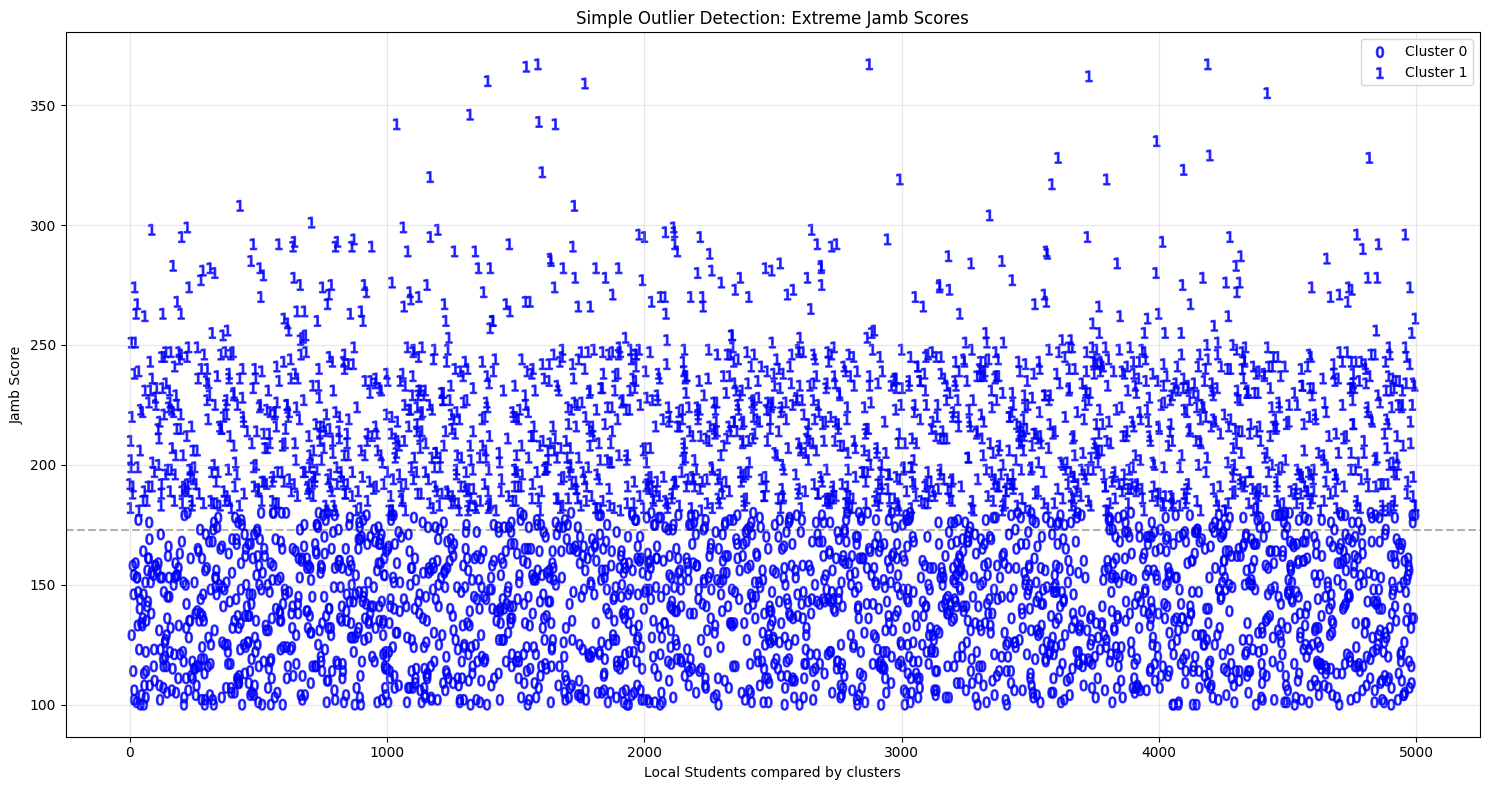

True outliers: 0 out of 4109


In [31]:
def identify_outliers_simple(df, column='JAMB_Score'):
    df_out = df.copy()
    df_out['Outlier'] = False
    df_out['Outlier_Type'] = 'Normal'
    
    for cluster in df_out['Student_cluster'].unique():
        cluster_data = df_out[df_out['Student_cluster'] == cluster]
        
    Q1 = cluster_data[column].quantile(0.25)
    Q3 = cluster_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    cluster_mask = df_out['Student_cluster'] == cluster
    df_out.loc[cluster_mask & (df_out[column] < lower_bound), 'Outlier_Type'] = 'Low Outlier'
    df_out.loc[cluster_mask & (df_out[column] > upper_bound), 'Outlier_Type'] = 'High Outlier'
    df_out.loc[cluster_mask & ~df_out[column].between(lower_bound, upper_bound), 'Outlier'] = True
    
    return df_out
    



outlier_df = identify_outliers_simple(df1, 'JAMB_Score')


plt.figure(figsize=(15, 8))
clusters=sorted(outlier_df['Student_cluster'].unique())

colors = ['red' if outlier else 'blue' for outlier in outlier_df['Outlier']]
sizes = [200 if outlier else 60 for outlier in outlier_df['Outlier']]

for i, cluster in enumerate(clusters):
    cluster_data=outlier_df[outlier_df['Student_cluster']==cluster]
    cluster_colors = ['red' if outlier else 'blue' for outlier in cluster_data['Outlier']]
    cluter_sizes = [200 if outlier else 60 for outlier in cluster_data['Outlier']]

    plt.scatter(cluster_data.index, cluster_data['JAMB_Score'], 
           c=cluster_colors, s=cluter_sizes, alpha=0.7, label=f'Cluster {cluster}',
        marker=f'${i}$' )

plt.axhline(y=outlier_df['JAMB_Score'].median(), color='black', linestyle='--', alpha=0.3)
plt.title('Simple Outlier Detection: Extreme Jamb Scores')
plt.xlabel('Local Students compared by clusters')
plt.ylabel('Jamb Score')
#plt.legend(handles=[
    #plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Normal'),
    #plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Outlier')
#])
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('Jamb Outlier Detections', dpi=300, bbox_inches='tight')

plt.show()

print(f"True outliers: {outlier_df['Outlier'].sum()} out of {len(outlier_df)}")

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
supervised_features=features_no_jamb_score=['Extra_Tutorials_Yes','Access_To_Learning_Materials_Yes', 'Parent_Education_Level_Tertiary','Study_Hours_Per_Week_zscore','Attendance_Rate','Distance_To_School_zscore', 'Age_zscore', 'School_Type_Public', 'Student_cluster'] 

X=df1[supervised_features]
y= df1['JAMB_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [33]:
y_pred = rf_regressor.predict(X_test)
print(f"R² Score: {r2_score(y_test, y_pred):.3f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")

R² Score: 0.693
MAE: 21.32


In [34]:
importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_regressor.feature_importances_
}).sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(importance)


Feature Importance:
                            feature  importance
8                   Student_cluster    0.690601
5         Distance_To_School_zscore    0.090858
3       Study_Hours_Per_Week_zscore    0.071398
4                   Attendance_Rate    0.066637
6                        Age_zscore    0.038090
0               Extra_Tutorials_Yes    0.011085
2   Parent_Education_Level_Tertiary    0.010638
1  Access_To_Learning_Materials_Yes    0.010590
7                School_Type_Public    0.010101


=== BINARY CLASSIFICATION (Pass/Fail) ===
Accuracy: 0.995
Recall:   0.989
F1-Score: 0.995


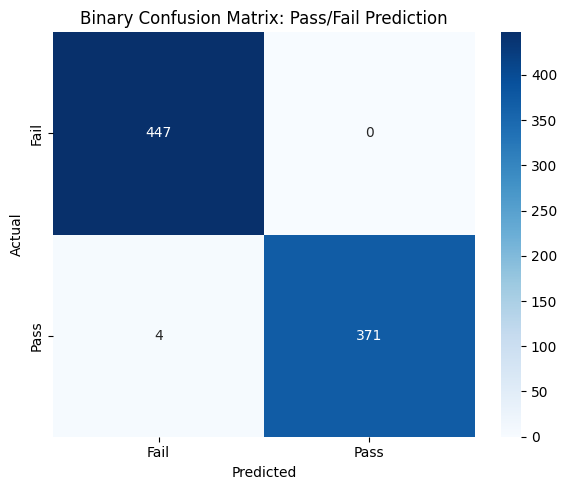

In [49]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report, confusion_matrix

def score_to_binary(score):
    return 'Pass' if score >= 180 else 'Fail'

y_test_binary = [score_to_binary(score) for score in y_test]
y_pred_binary = [score_to_binary(score) for score in y_pred]


accuracy_binary = accuracy_score(y_test_binary, y_pred_binary)
recall_binary = recall_score(y_test_binary, y_pred_binary, pos_label='Pass')
f1_binary = f1_score(y_test_binary, y_pred_binary, pos_label='Pass')

print("=== BINARY CLASSIFICATION (Pass/Fail) ===")
print(f"Accuracy: {accuracy_binary:.3f}")
print(f"Recall:   {recall_binary:.3f}")  
print(f"F1-Score: {f1_binary:.3f}")


cm_binary = confusion_matrix(y_test_binary, y_pred_binary, labels=['Fail', 'Pass'])
plt.figure(figsize=(6, 5))
sns.heatmap(cm_binary, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fail', 'Pass'],
            yticklabels=['Fail', 'Pass'])
plt.title('Binary Confusion Matrix: Pass/Fail Prediction')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()

plt.savefig('Jamb Outlier Detections', dpi=300, bbox_inches='tight')
plt.show()